# Keras代码示例

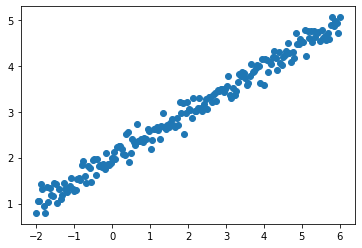

Epoch 1/100
160/160 [==============================] - 0s 3ms/step - loss: 9.9416
Epoch 2/100
160/160 [==============================] - 0s 75us/step - loss: 2.5587
Epoch 3/100
160/160 [==============================] - 0s 84us/step - loss: 2.6630
Epoch 4/100
160/160 [==============================] - 0s 110us/step - loss: 0.6297
Epoch 5/100
160/160 [==============================] - 0s 83us/step - loss: 0.5404
Epoch 6/100
160/160 [==============================] - 0s 115us/step - loss: 0.1333
Epoch 7/100
160/160 [==============================] - 0s 94us/step - loss: 0.0787
Epoch 8/100
160/160 [==============================] - 0s 106us/step - loss: 0.0318
Epoch 9/100
160/160 [==============================] - 0s 151us/step - loss: 0.0389
Epoch 10/100
160/160 [==============================] - 0s 99us/step - loss: 0.0508
Epoch 11/100
160/160 [==============================] - 0s 78us/step - loss: 0.0599
Epoch 12/100
160/160 [==============================] - 0s 125us/step - loss: 0.05

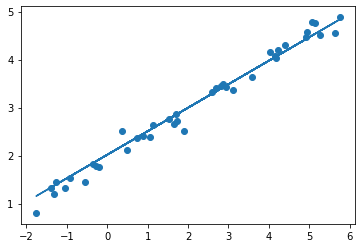

In [2]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense

from keras.optimizers import SGD
 
X = np.linspace(-2, 6, 200)
np.random.shuffle(X)
Y = 0.5 * X + 2 + 0.15 * np.random.randn(200,) 
 
# plot data
plt.scatter(X, Y)
plt.show()
 
X_train, Y_train = X[:160], Y[:160]     # train first 160 data points
X_test, Y_test = X[160:], Y[160:]       # test remaining 40 data points

model = Sequential()
model.add(Dense(input_dim=1, units=1))

model.compile(loss='mse', optimizer='sgd')

model.compile(loss='mse', optimizer=SGD(lr=0.01, momentum=0.9, nesterov=True))

model.fit(X_train, Y_train, epochs=100, batch_size=64)

#model.train_on_batch(X_batch, Y_batch)

print('Training -----------')
for step in range(100):
    cost = model.train_on_batch(X_train, Y_train)
    if step % 20 == 0:
        print('train cost: ', cost)

cost = model.evaluate(X_test, Y_test, batch_size=40)


print('\nTesting ------------')
loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=40)
print('test cost:', cost)
W, b = model.layers[0].get_weights()
print('Weights=', W, '\nbiases=', b)

Y_pred = model.predict(X_test)
plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_pred)
plt.show()